updated preds values, temp, 0
feature importances:  [8.7044191e-01 2.9664482e-03 6.7336025e-04 4.7821882e-03 3.2338644e-03
 2.4132808e-03 1.0115348e-03 1.1975861e-03 1.7256084e-03 8.6817465e-04
 4.9963215e-04 6.7948783e-04 7.9814275e-04 4.6927555e-04 7.3786685e-04
 7.4491807e-04 7.3026255e-04 8.5915410e-04 2.1353753e-03 2.1950498e-03
 1.5393400e-02 2.1673318e-02 5.9278332e-02 1.4165434e-03 1.2355668e-03
 1.8397078e-03]
rmse:  0.8349169632766237


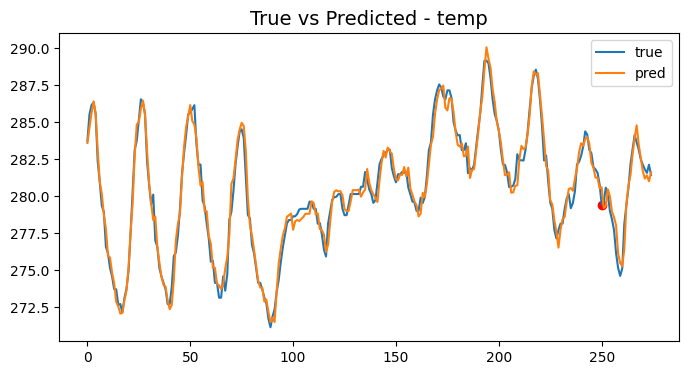

In [1]:
from xgb_train import main
df_pred_xgb = main()

Running models for each time step


100%|██████████| 25/25 [00:20<00:00,  1.25it/s]

rmse:  1.193756763822494


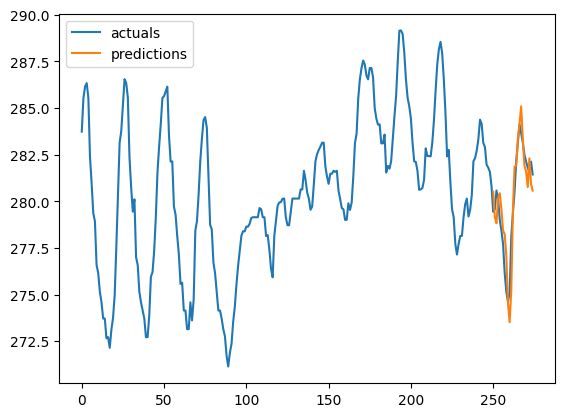

In [3]:
from sarima_train import main
df_pred_sarima = main()

In [33]:
import pandas as pd
df_preds = pd.DataFrame(zip(df_pred_sarima['actuals'], df_pred_sarima['predictions'],df_pred_xgb['temp_pred'].reset_index(drop=True)),columns = ['actuals','sarima','xgb'])
df_preds = df_preds.iloc[-50:]

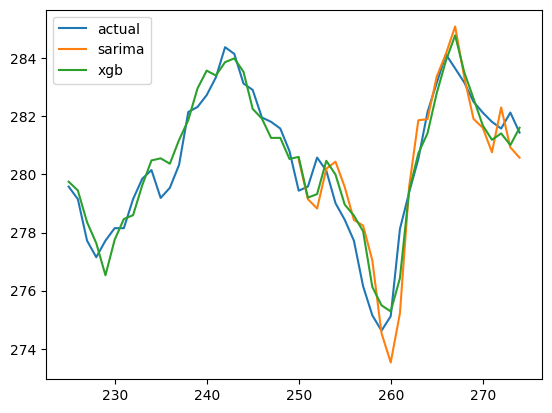

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_preds,label = ['actual','sarima','xgb'])
plt.legend()

updated preds values, temp, 0
feature importances:  [8.7044191e-01 2.9664482e-03 6.7336025e-04 4.7821882e-03 3.2338644e-03
 2.4132808e-03 1.0115348e-03 1.1975861e-03 1.7256084e-03 8.6817465e-04
 4.9963215e-04 6.7948783e-04 7.9814275e-04 4.6927555e-04 7.3786685e-04
 7.4491807e-04 7.3026255e-04 8.5915410e-04 2.1353753e-03 2.1950498e-03
 1.5393400e-02 2.1673318e-02 5.9278332e-02 1.4165434e-03 1.2355668e-03
 1.8397078e-03]
rmse:  0.8349169632766237
Running models for each time step


100%|██████████| 25/25 [00:15<00:00,  1.57it/s]

rmse:  1.193756763822494


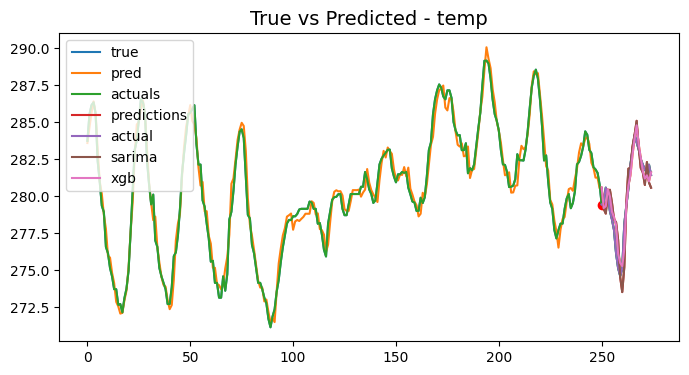

In [1]:
from xgb_train import main as xgb_main
from sarima_train import main as sarima_main
import pandas as pd
import matplotlib.pyplot as plt

def get_outputs():
    df_pred_xgb = xgb_main()
    df_pred_sarima = sarima_main()

    df_preds = pd.DataFrame(zip(df_pred_sarima['actuals'], df_pred_sarima['predictions'],df_pred_xgb['temp_pred'].reset_index(drop=True)),columns = ['actuals','sarima','xgb'])
    df_preds = df_preds.iloc[-25:]
    plt.plot(df_preds,label = ['actual','sarima','xgb'])
    plt.legend()

get_outputs()

In [4]:
import streamlit as st
st.write('hi')

st.write("""
# My first app
Hello *world!*
""")
 
from data_prep import load_clean_weather_data
df_we = load_clean_weather_data()

st.line_chart(df_we['temp'])


2025-08-12 15:50:07.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:50:07.800 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:50:07.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:50:07.802 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:50:07.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 15:50:07.803 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\EAFar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc,

DeltaGenerator()

In [5]:
"""
Methods that can be shared by many array-like classes or subclasses:
    Series
    Index
    ExtensionArray
"""
from __future__ import annotations

import operator
from typing import Any

import numpy as np

from pandas._libs import lib
from pandas._libs.ops_dispatch import maybe_dispatch_ufunc_to_dunder_op

from pandas.core.dtypes.generic import ABCNDFrame

from pandas.core import roperator
from pandas.core.construction import extract_array
from pandas.core.ops.common import unpack_zerodim_and_defer

REDUCTION_ALIASES = {
    "maximum": "max",
    "minimum": "min",
    "add": "sum",
    "multiply": "prod",
}


class OpsMixin:
    # -------------------------------------------------------------
    # Comparisons

    def _cmp_method(self, other, op):
        return NotImplemented

    @unpack_zerodim_and_defer("__eq__")
    def __eq__(self, other):
        return self._cmp_method(other, operator.eq)

    @unpack_zerodim_and_defer("__ne__")
    def __ne__(self, other):
        return self._cmp_method(other, operator.ne)

    @unpack_zerodim_and_defer("__lt__")
    def __lt__(self, other):
        return self._cmp_method(other, operator.lt)

    @unpack_zerodim_and_defer("__le__")
    def __le__(self, other):
        return self._cmp_method(other, operator.le)

    @unpack_zerodim_and_defer("__gt__")
    def __gt__(self, other):
        return self._cmp_method(other, operator.gt)

    @unpack_zerodim_and_defer("__ge__")
    def __ge__(self, other):
        return self._cmp_method(other, operator.ge)

    # -------------------------------------------------------------
    # Logical Methods

    def _logical_method(self, other, op):
        return NotImplemented

    @unpack_zerodim_and_defer("__and__")
    def __and__(self, other):
        return self._logical_method(other, operator.and_)

    @unpack_zerodim_and_defer("__rand__")
    def __rand__(self, other):
        return self._logical_method(other, roperator.rand_)

    @unpack_zerodim_and_defer("__or__")
    def __or__(self, other):
        return self._logical_method(other, operator.or_)

    @unpack_zerodim_and_defer("__ror__")
    def __ror__(self, other):
        return self._logical_method(other, roperator.ror_)

    @unpack_zerodim_and_defer("__xor__")
    def __xor__(self, other):
        return self._logical_method(other, operator.xor)

    @unpack_zerodim_and_defer("__rxor__")
    def __rxor__(self, other):
        return self._logical_method(other, roperator.rxor)

    # -------------------------------------------------------------
    # Arithmetic Methods

    def _arith_method(self, other, op):
        return NotImplemented

    @unpack_zerodim_and_defer("__add__")
    def __add__(self, other):
        """
        Get Addition of DataFrame and other, column-wise.

        Equivalent to ``DataFrame.add(other)``.

        Parameters
        ----------
        other : scalar, sequence, Series, dict or DataFrame
            Object to be added to the DataFrame.

        Returns
        -------
        DataFrame
            The result of adding ``other`` to DataFrame.

        See Also
        --------
        DataFrame.add : Add a DataFrame and another object, with option for index-
            or column-oriented addition.

        Examples
        --------
        >>> df = pd.DataFrame({'height': [1.5, 2.6], 'weight': [500, 800]},
        ...                   index=['elk', 'moose'])
        >>> df
               height  weight
        elk       1.5     500
        moose     2.6     800

        Adding a scalar affects all rows and columns.

        >>> df[['height', 'weight']] + 1.5
               height  weight
        elk       3.0   501.5
        moose     4.1   801.5

        Each element of a list is added to a column of the DataFrame, in order.

        >>> df[['height', 'weight']] + [0.5, 1.5]
               height  weight
        elk       2.0   501.5
        moose     3.1   801.5

        Keys of a dictionary are aligned to the DataFrame, based on column names;
        each value in the dictionary is added to the corresponding column.

        >>> df[['height', 'weight']] + {'height': 0.5, 'weight': 1.5}
               height  weight
        elk       2.0   501.5
        moose     3.1   801.5

        When `other` is a :class:`Series`, the index of `other` is aligned with the
        columns of the DataFrame.

        >>> s1 = pd.Series([0.5, 1.5], index=['weight', 'height'])
        >>> df[['height', 'weight']] + s1
               height  weight
        elk       3.0   500.5
        moose     4.1   800.5

        Even when the index of `other` is the same as the index of the DataFrame,
        the :class:`Series` will not be reoriented. If index-wise alignment is desired,
        :meth:`DataFrame.add` should be used with `axis='index'`.

        >>> s2 = pd.Series([0.5, 1.5], index=['elk', 'moose'])
        >>> df[['height', 'weight']] + s2
               elk  height  moose  weight
        elk    NaN     NaN    NaN     NaN
        moose  NaN     NaN    NaN     NaN

        >>> df[['height', 'weight']].add(s2, axis='index')
               height  weight
        elk       2.0   500.5
        moose     4.1   801.5

        When `other` is a :class:`DataFrame`, both columns names and the
        index are aligned.

        >>> other = pd.DataFrame({'height': [0.2, 0.4, 0.6]},
        ...                      index=['elk', 'moose', 'deer'])
        >>> df[['height', 'weight']] + other
               height  weight
        deer      NaN     NaN
        elk       1.7     NaN
        moose     3.0     NaN
        """
        return self._arith_method(other, operator.add)

    @unpack_zerodim_and_defer("__radd__")
    def __radd__(self, other):
        return self._arith_method(other, roperator.radd)

    @unpack_zerodim_and_defer("__sub__")
    def __sub__(self, other):
        return self._arith_method(other, operator.sub)

    @unpack_zerodim_and_defer("__rsub__")
    def __rsub__(self, other):
        return self._arith_method(other, roperator.rsub)

    @unpack_zerodim_and_defer("__mul__")
    def __mul__(self, other):
        return self._arith_method(other, operator.mul)

    @unpack_zerodim_and_defer("__rmul__")
    def __rmul__(self, other):
        return self._arith_method(other, roperator.rmul)

    @unpack_zerodim_and_defer("__truediv__")
    def __truediv__(self, other):
        return self._arith_method(other, operator.truediv)

    @unpack_zerodim_and_defer("__rtruediv__")
    def __rtruediv__(self, other):
        return self._arith_method(other, roperator.rtruediv)

    @unpack_zerodim_and_defer("__floordiv__")
    def __floordiv__(self, other):
        return self._arith_method(other, operator.floordiv)

    @unpack_zerodim_and_defer("__rfloordiv")
    def __rfloordiv__(self, other):
        return self._arith_method(other, roperator.rfloordiv)

    @unpack_zerodim_and_defer("__mod__")
    def __mod__(self, other):
        return self._arith_method(other, operator.mod)

    @unpack_zerodim_and_defer("__rmod__")
    def __rmod__(self, other):
        return self._arith_method(other, roperator.rmod)

    @unpack_zerodim_and_defer("__divmod__")
    def __divmod__(self, other):
        return self._arith_method(other, divmod)

    @unpack_zerodim_and_defer("__rdivmod__")
    def __rdivmod__(self, other):
        return self._arith_method(other, roperator.rdivmod)

    @unpack_zerodim_and_defer("__pow__")
    def __pow__(self, other):
        return self._arith_method(other, operator.pow)

    @unpack_zerodim_and_defer("__rpow__")
    def __rpow__(self, other):
        return self._arith_method(other, roperator.rpow)


# -----------------------------------------------------------------------------
# Helpers to implement __array_ufunc__


def array_ufunc(self, ufunc: np.ufunc, method: str, *inputs: Any, **kwargs: Any):
    """
    Compatibility with numpy ufuncs.

    See also
    --------
    numpy.org/doc/stable/reference/arrays.classes.html#numpy.class.__array_ufunc__
    """
    from pandas.core.frame import (
        DataFrame,
        Series,
    )
    from pandas.core.generic import NDFrame
    from pandas.core.internals import (
        ArrayManager,
        BlockManager,
    )

    cls = type(self)

    kwargs = _standardize_out_kwarg(**kwargs)

    # for binary ops, use our custom dunder methods
    result = maybe_dispatch_ufunc_to_dunder_op(self, ufunc, method, *inputs, **kwargs)
    if result is not NotImplemented:
        return result

    # Determine if we should defer.
    no_defer = (
        np.ndarray.__array_ufunc__,
        cls.__array_ufunc__,
    )

    for item in inputs:
        higher_priority = (
            hasattr(item, "__array_priority__")
            and item.__array_priority__ > self.__array_priority__
        )
        has_array_ufunc = (
            hasattr(item, "__array_ufunc__")
            and type(item).__array_ufunc__ not in no_defer
            and not isinstance(item, self._HANDLED_TYPES)
        )
        if higher_priority or has_array_ufunc:
            return NotImplemented

    # align all the inputs.
    types = tuple(type(x) for x in inputs)
    alignable = [x for x, t in zip(inputs, types) if issubclass(t, NDFrame)]

    if len(alignable) > 1:
        # This triggers alignment.
        # At the moment, there aren't any ufuncs with more than two inputs
        # so this ends up just being x1.index | x2.index, but we write
        # it to handle *args.
        set_types = set(types)
        if len(set_types) > 1 and {DataFrame, Series}.issubset(set_types):
            # We currently don't handle ufunc(DataFrame, Series)
            # well. Previously this raised an internal ValueError. We might
            # support it someday, so raise a NotImplementedError.
            raise NotImplementedError(
                f"Cannot apply ufunc {ufunc} to mixed DataFrame and Series inputs."
            )
        axes = self.axes
        for obj in alignable[1:]:
            # this relies on the fact that we aren't handling mixed
            # series / frame ufuncs.
            for i, (ax1, ax2) in enumerate(zip(axes, obj.axes)):
                axes[i] = ax1.union(ax2)

        reconstruct_axes = dict(zip(self._AXIS_ORDERS, axes))
        inputs = tuple(
            x.reindex(**reconstruct_axes) if issubclass(t, NDFrame) else x
            for x, t in zip(inputs, types)
        )
    else:
        reconstruct_axes = dict(zip(self._AXIS_ORDERS, self.axes))

    if self.ndim == 1:
        names = [getattr(x, "name") for x in inputs if hasattr(x, "name")]
        name = names[0] if len(set(names)) == 1 else None
        reconstruct_kwargs = {"name": name}
    else:
        reconstruct_kwargs = {}

    def reconstruct(result):
        if ufunc.nout > 1:
            # np.modf, np.frexp, np.divmod
            return tuple(_reconstruct(x) for x in result)

        return _reconstruct(result)

    def _reconstruct(result):
        if lib.is_scalar(result):
            return result

        if result.ndim != self.ndim:
            if method == "outer":
                raise NotImplementedError
            return result
        if isinstance(result, (BlockManager, ArrayManager)):
            # we went through BlockManager.apply e.g. np.sqrt
            result = self._constructor_from_mgr(result, axes=result.axes)
        else:
            # we converted an array, lost our axes
            result = self._constructor(
                result, **reconstruct_axes, **reconstruct_kwargs, copy=False
            )
        # TODO: When we support multiple values in __finalize__, this
        # should pass alignable to `__finalize__` instead of self.
        # Then `np.add(a, b)` would consider attrs from both a and b
        # when a and b are NDFrames.
        if len(alignable) == 1:
            result = result.__finalize__(self)
        return result

    if "out" in kwargs:
        # e.g. test_multiindex_get_loc
        result = dispatch_ufunc_with_out(self, ufunc, method, *inputs, **kwargs)
        return reconstruct(result)

    if method == "reduce":
        # e.g. test.series.test_ufunc.test_reduce
        result = dispatch_reduction_ufunc(self, ufunc, method, *inputs, **kwargs)
        if result is not NotImplemented:
            return result

    # We still get here with kwargs `axis` for e.g. np.maximum.accumulate
    #  and `dtype` and `keepdims` for np.ptp

    if self.ndim > 1 and (len(inputs) > 1 or ufunc.nout > 1):
        # Just give up on preserving types in the complex case.
        # In theory we could preserve them for them.
        # * nout>1 is doable if BlockManager.apply took nout and
        #   returned a Tuple[BlockManager].
        # * len(inputs) > 1 is doable when we know that we have
        #   aligned blocks / dtypes.

        # e.g. my_ufunc, modf, logaddexp, heaviside, subtract, add
        inputs = tuple(np.asarray(x) for x in inputs)
        # Note: we can't use default_array_ufunc here bc reindexing means
        #  that `self` may not be among `inputs`
        result = getattr(ufunc, method)(*inputs, **kwargs)
    elif self.ndim == 1:
        # ufunc(series, ...)
        inputs = tuple(extract_array(x, extract_numpy=True) for x in inputs)
        result = getattr(ufunc, method)(*inputs, **kwargs)
    else:
        # ufunc(dataframe)
        if method == "__call__" and not kwargs:
            # for np.<ufunc>(..) calls
            # kwargs cannot necessarily be handled block-by-block, so only
            # take this path if there are no kwargs
            mgr = inputs[0]._mgr
            result = mgr.apply(getattr(ufunc, method))
        else:
            # otherwise specific ufunc methods (eg np.<ufunc>.accumulate(..))
            # Those can have an axis keyword and thus can't be called block-by-block
            result = default_array_ufunc(inputs[0], ufunc, method, *inputs, **kwargs)
            # e.g. np.negative (only one reached), with "where" and "out" in kwargs

    result = reconstruct(result)
    return result


def _standardize_out_kwarg(**kwargs) -> dict:
    """
    If kwargs contain "out1" and "out2", replace that with a tuple "out"

    np.divmod, np.modf, np.frexp can have either `out=(out1, out2)` or
    `out1=out1, out2=out2)`
    """
    if "out" not in kwargs and "out1" in kwargs and "out2" in kwargs:
        out1 = kwargs.pop("out1")
        out2 = kwargs.pop("out2")
        out = (out1, out2)
        kwargs["out"] = out
    return kwargs


def dispatch_ufunc_with_out(self, ufunc: np.ufunc, method: str, *inputs, **kwargs):
    """
    If we have an `out` keyword, then call the ufunc without `out` and then
    set the result into the given `out`.
    """

    # Note: we assume _standardize_out_kwarg has already been called.
    out = kwargs.pop("out")
    where = kwargs.pop("where", None)

    result = getattr(ufunc, method)(*inputs, **kwargs)

    if result is NotImplemented:
        return NotImplemented

    if isinstance(result, tuple):
        # i.e. np.divmod, np.modf, np.frexp
        if not isinstance(out, tuple) or len(out) != len(result):
            raise NotImplementedError

        for arr, res in zip(out, result):
            _assign_where(arr, res, where)

        return out

    if isinstance(out, tuple):
        if len(out) == 1:
            out = out[0]
        else:
            raise NotImplementedError

    _assign_where(out, result, where)
    return out


def _assign_where(out, result, where) -> None:
    """
    Set a ufunc result into 'out', masking with a 'where' argument if necessary.
    """
    if where is None:
        # no 'where' arg passed to ufunc
        out[:] = result
    else:
        np.putmask(out, where, result)


def default_array_ufunc(self, ufunc: np.ufunc, method: str, *inputs, **kwargs):
    """
    Fallback to the behavior we would get if we did not define __array_ufunc__.

    Notes
    -----
    We are assuming that `self` is among `inputs`.
    """
    if not any(x is self for x in inputs):
        raise NotImplementedError

    new_inputs = [x if x is not self else np.asarray(x) for x in inputs]

    return getattr(ufunc, method)(*new_inputs, **kwargs)


def dispatch_reduction_ufunc(self, ufunc: np.ufunc, method: str, *inputs, **kwargs):
    """
    Dispatch ufunc reductions to self's reduction methods.
    """
    assert method == "reduce"

    if len(inputs) != 1 or inputs[0] is not self:
        return NotImplemented

    if ufunc.__name__ not in REDUCTION_ALIASES:
        return NotImplemented

    method_name = REDUCTION_ALIASES[ufunc.__name__]

    # NB: we are assuming that min/max represent minimum/maximum methods,
    #  which would not be accurate for e.g. Timestamp.min
    if not hasattr(self, method_name):
        return NotImplemented

    if self.ndim > 1:
        if isinstance(self, ABCNDFrame):
            # TODO: test cases where this doesn't hold, i.e. 2D DTA/TDA
            kwargs["numeric_only"] = False

        if "axis" not in kwargs:
            # For DataFrame reductions we don't want the default axis=0
            # Note: np.min is not a ufunc, but uses array_function_dispatch,
            #  so calls DataFrame.min (without ever getting here) with the np.min
            #  default of axis=None, which DataFrame.min catches and changes to axis=0.
            # np.minimum.reduce(df) gets here bc axis is not in kwargs,
            #  so we set axis=0 to match the behaviorof np.minimum.reduce(df.values)
            kwargs["axis"] = 0

    # By default, numpy's reductions do not skip NaNs, so we have to
    #  pass skipna=False
    return getattr(self, method_name)(skipna=False, **kwargs)
